## Introduction

This notebook is a reflection of the Customer_Segmentation_Using_R notebook. I will running the same steps going through a basic customer segmentation task, but using python and scikit learn instead of R. To start, I will load in data and libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=2)
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

Here I will go through the distributions of our data and look at the interaction between our numerical variables (age, income and spending score).

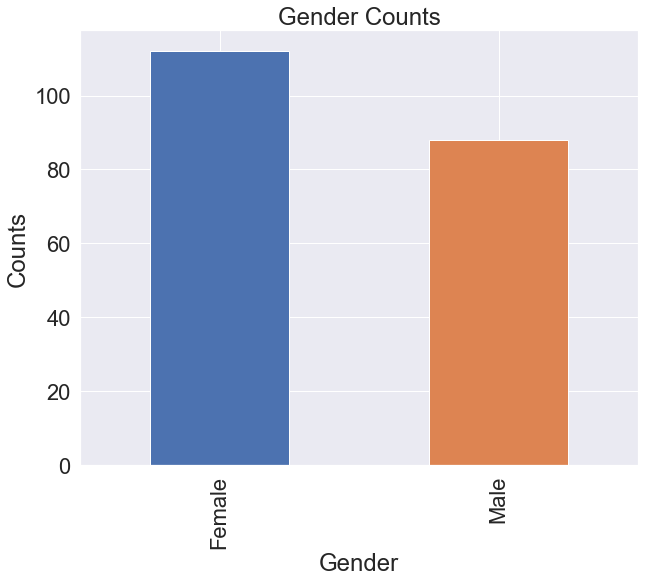

In [4]:
fig = plt.figure(figsize=(10,8))
data.Gender.value_counts().plot(kind='bar')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

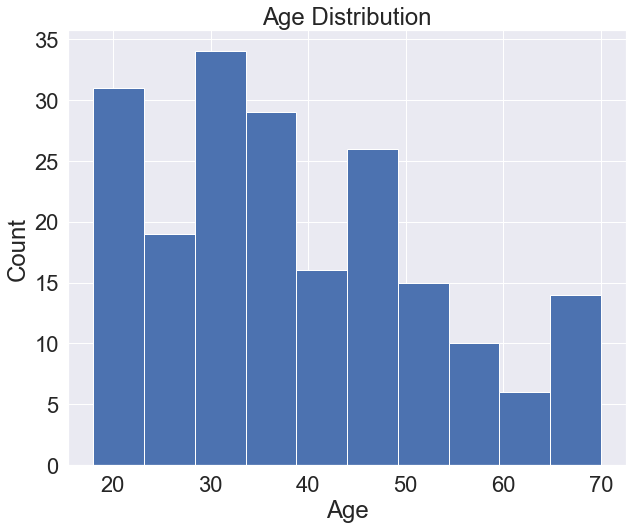

In [5]:
fig = plt.figure(figsize=(10,8))
data.Age.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

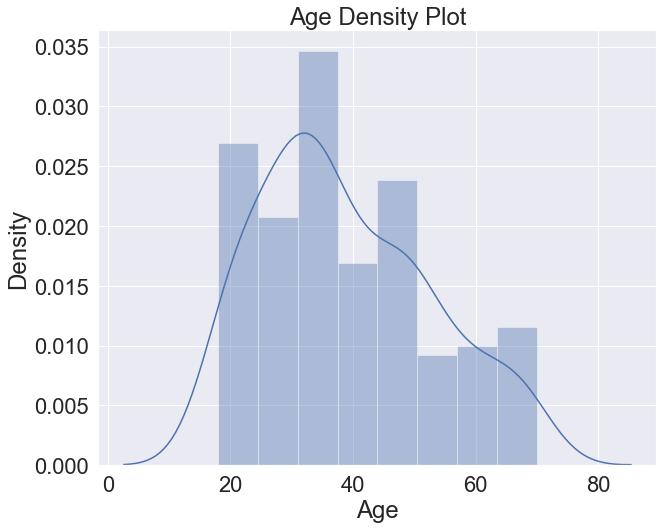

In [6]:
fig = plt.figure(figsize=(10,8))
sns.distplot(data.Age)
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

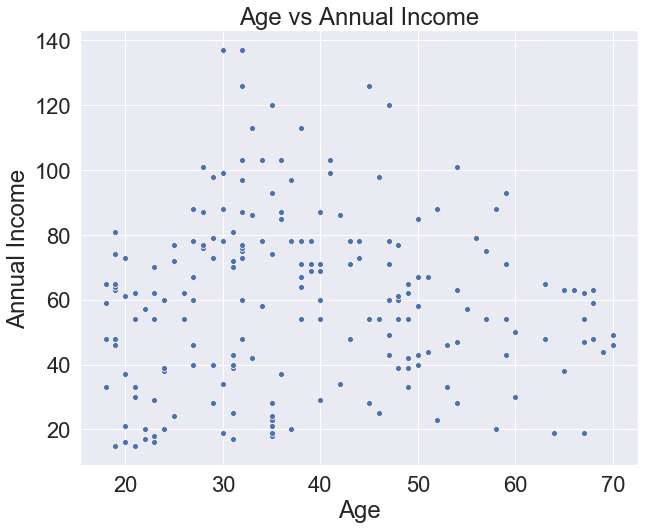

In [7]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data.Age, data.Annual_Income)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

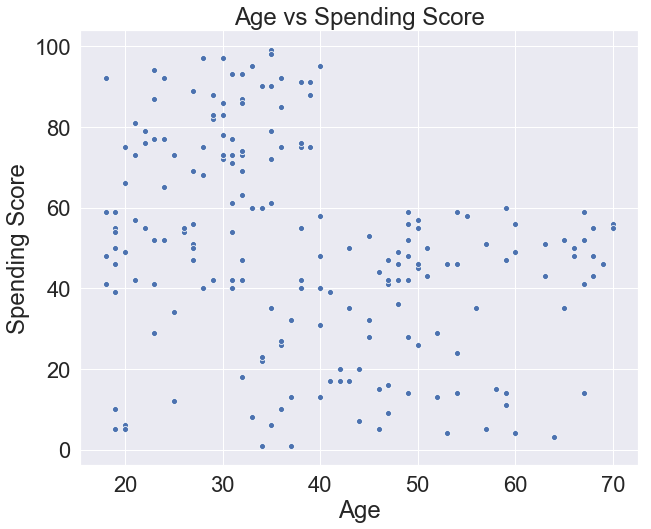

In [8]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data.Age, data.Spending_Score)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

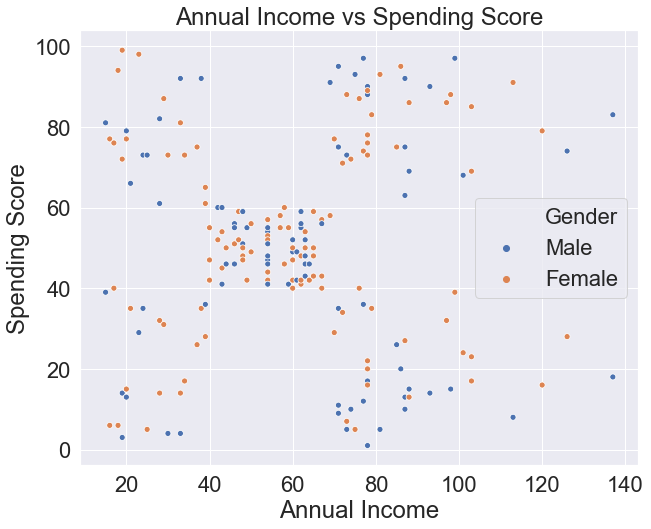

In [9]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data.Annual_Income, data.Spending_Score, hue = data.Gender)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Analysis

Now I will calculate the distortions of using a k from between the range of 1 to 20, then plot the distortions on an elbow graph to choose how many clusters to use.

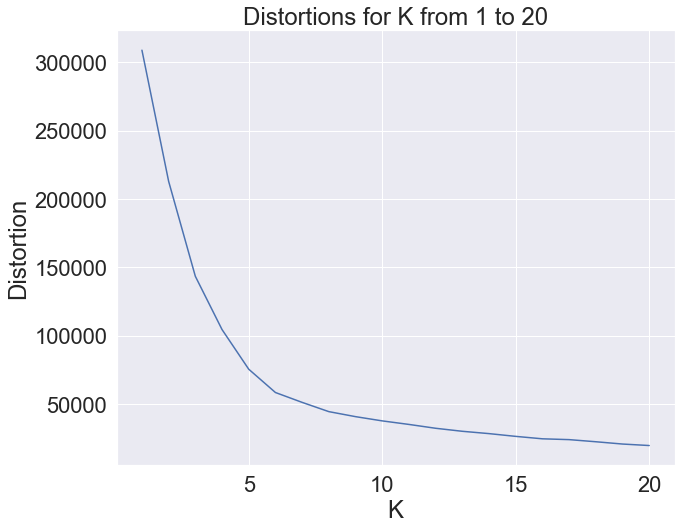

In [10]:
k_range = range(1,21)
X = data[['Age', 'Annual_Income', 'Spending_Score']]
errors = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    errors.append(model.inertia_)

fig = plt.figure(figsize=(10,8))
sns.lineplot(k_range, errors)
plt.title('Distortions for K from 1 to 20')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

Because of the shape of the elbow plot, I will comparing models using 5 and 6 clusters. First up is the model with 5 clusters. I will plot the results of the model on three axes: annual income vs spending score, age vs annual income, and age vs spending score. This will show the relationship between all three of our numeric variables.

In [11]:
model_5_clusters = KMeans(n_clusters=5)
label_5 = model_5_clusters.fit_predict(X)

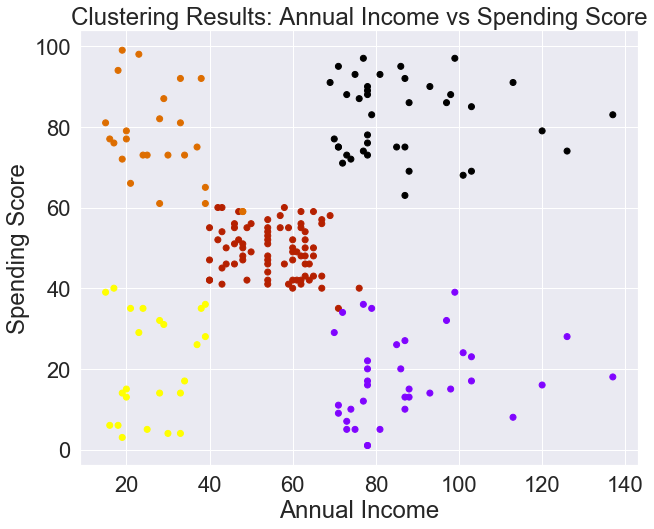

In [12]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Annual_Income, X.Spending_Score, c=label_5, cmap='gnuplot')
plt.title('Clustering Results: Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

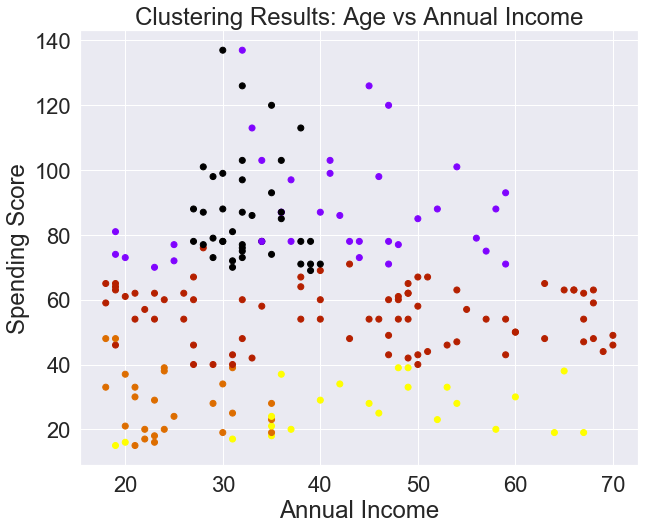

In [13]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Age, X.Annual_Income, c=label_5, cmap='gnuplot')
plt.title('Clustering Results: Age vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

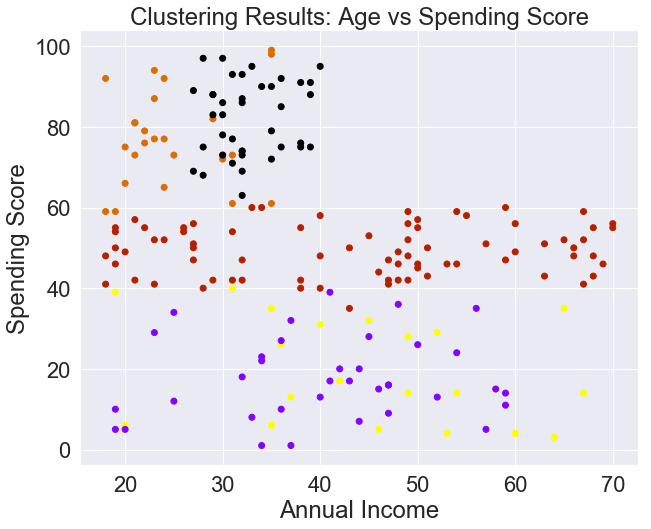

In [14]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Age, X.Spending_Score, c=label_5, cmap='gnuplot')
plt.title('Clustering Results: Age vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

This model seems very useful in segmenting the customer base in regards to spending score and income, but is less useful for separating groups when accounting for age. many of the groups contain ages from all parts of our distribution.

Next up is the model with 6 clusters. I will perform the same steps as above, plotting the relationship between all of our numeric variables.

In [15]:
model_6_clusters = KMeans(n_clusters=6)
label_6 = model_6_clusters.fit_predict(X)

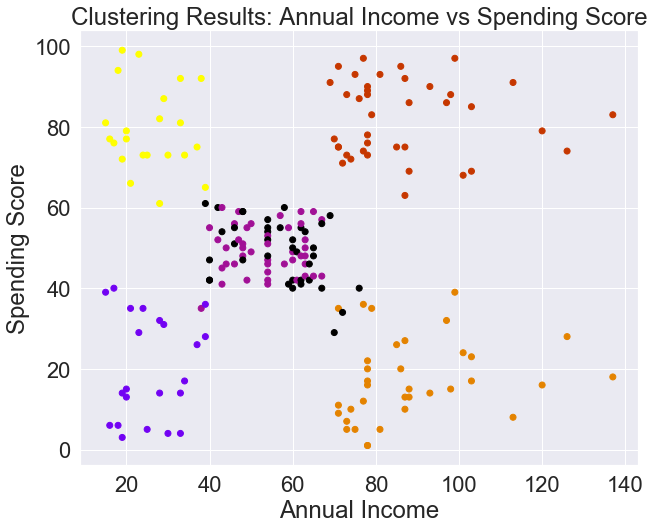

In [16]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Annual_Income, X.Spending_Score, c=label_6, cmap='gnuplot')
plt.title('Clustering Results: Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

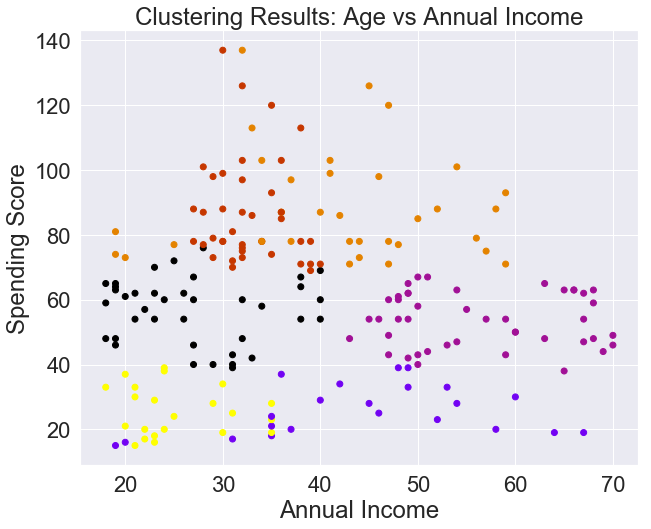

In [17]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Age, X.Annual_Income, c=label_6, cmap='gnuplot')
plt.title('Clustering Results: Age vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

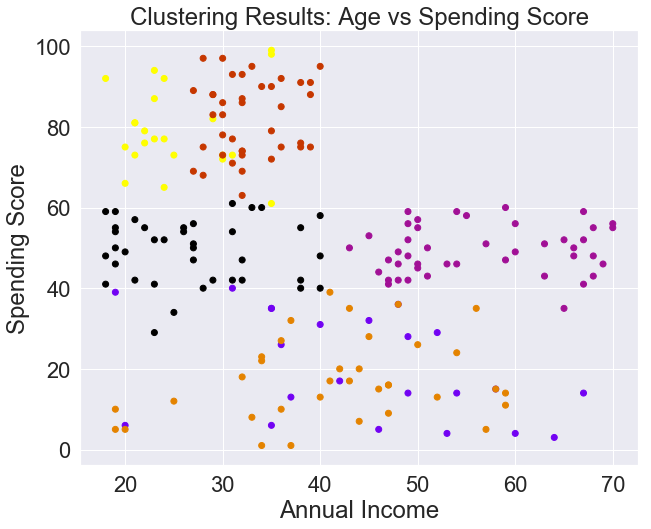

In [18]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X.Age, X.Spending_Score, c=label_6, cmap='gnuplot')
plt.title('Clustering Results: Age vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The model using 6 clusters has two clusters overlap nearly completely when looking at the income vs spending graph, however the 6 cluster model is better at breaking up age ranges than the five cluster model. I would stick with the 6 cluster model because it has pretty well defined segments on each of the three dimensions.